In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.initializers import GlorotNormal

In [20]:
df= pd.read_csv("../ML/datasets/iris.csv")
df

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
y = df['target']

print(y[:5])

yc = pd.get_dummies(y)
print(yc[:5])

from keras.utils import to_categorical
yc2 = to_categorical(y, num_classes = 3 , dtype='int')
print(yc2[:5])

X = df.drop(['target'],  axis=1)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size=0.2, 
                                                    stratify=y, random_state=1111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 
print(y_train[:5])

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
   0  1  2
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
(150, 4) (150,)
     0  1  2
15   1  0  0
79   0  1  0
4    1  0  0
117  0  0  1
118  0  0  1


In [23]:
model = Sequential()
model.add(Dense(10, input_dim = 4, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(6,  activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss= 'categorical_crossentropy',optimizer='Adam' ,metrics=['accuracy'] )


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                50        
                                                                 
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 3)                 21        
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [25]:
fit_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60)
print(fit_history)
pred = model.predict(X_test)

Epoch 1/60
4/4 [==============================] - 1s 40ms/step - loss: 1.1507 - accuracy: 0.3333 - val_loss: 1.1299 - val_accuracy: 0.3333
Epoch 2/60
4/4 [==============================] - 0s 8ms/step - loss: 1.1258 - accuracy: 0.3333 - val_loss: 1.1107 - val_accuracy: 0.3333
Epoch 3/60
4/4 [==============================] - 0s 10ms/step - loss: 1.1086 - accuracy: 0.3333 - val_loss: 1.0948 - val_accuracy: 0.3333
Epoch 4/60
4/4 [==============================] - 0s 9ms/step - loss: 1.0933 - accuracy: 0.3333 - val_loss: 1.0798 - val_accuracy: 0.3333
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 1.0797 - accuracy: 0.3333 - val_loss: 1.0667 - val_accuracy: 0.3333
Epoch 6/60
4/4 [==============================] - 0s 9ms/step - loss: 1.0668 - accuracy: 0.3333 - val_loss: 1.0545 - val_accuracy: 0.3333
Epoch 7/60
4/4 [==============================] - 0s 9ms/step - loss: 1.0563 - accuracy: 0.3417 - val_loss: 1.0408 - val_accuracy: 0.4667
Epoch 8/60
4/4 [================

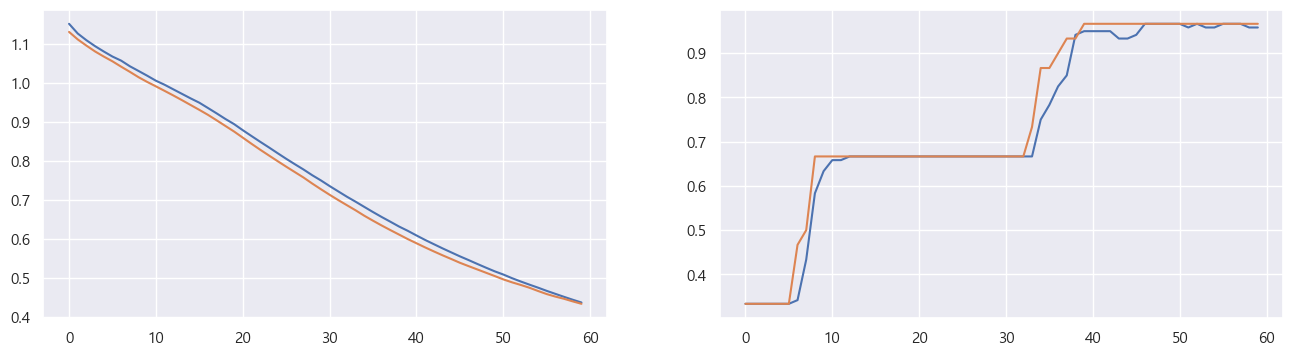

In [26]:
plt.figure(figsize = (16,4))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_history.history['loss'], label = "loss")
ax1.plot(fit_history.history['val_loss'], label = "val_loss")


ax2= plt.subplot(1,2,2)
ax2.plot(fit_history.history['accuracy'], label = "accuracy")
ax2.plot(fit_history.history['val_accuracy'], label = "val_accuracy")

plt.show()

In [27]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.4336 - accuracy: 0.9667


[0.4336307644844055, 0.9666666388511658]

In [28]:
proba = model.predict(X_test)
print(pred[:5])
pred = np.argmax(proba, axis=1)
print(pred)

y_test22 =  np.argmax(y_test.values, axis=1)
print(y_test22)


from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test22, pred)


# print(f1_score(y_test, pred))


1/1 [==============================] - 0s 17ms/step
[[0.12993896 0.51472807 0.35533294]
 [0.10970808 0.49228534 0.3980066 ]
 [0.10245082 0.5114532  0.386096  ]
 [0.02237869 0.36770663 0.60991466]
 [0.9131165  0.07830966 0.00857382]]
[1 1 1 2 0 1 0 2 2 2 0 2 0 0 0 2 0 2 0 2 1 1 1 1 2 0 0 1 2 2]
[1 1 1 2 0 1 0 2 2 2 0 2 0 0 0 2 0 2 0 2 1 1 1 1 1 0 0 1 2 2]


array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)